# Set-up an

In [1]:
# Instalasi library jika diperlukan
!pip install -q seaborn

# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train_url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/FeatureEngineering/train.csv"
test_url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/FeatureEngineering/test.csv"

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)


# Exploratory Data Analysis (EDA) dan Data Visualization

In [3]:
# Tampilkan informasi dasar tentang dataset
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
print("\nTrain Data Columns:", train_df.columns.tolist())
print("\nMissing Values in Train Data:")
print(train_df.isnull().sum())
print("\nData Types:")
print(train_df.dtypes)

Train Data Shape: (1460, 81)
Test Data Shape: (1459, 80)

Train Data Columns: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'O

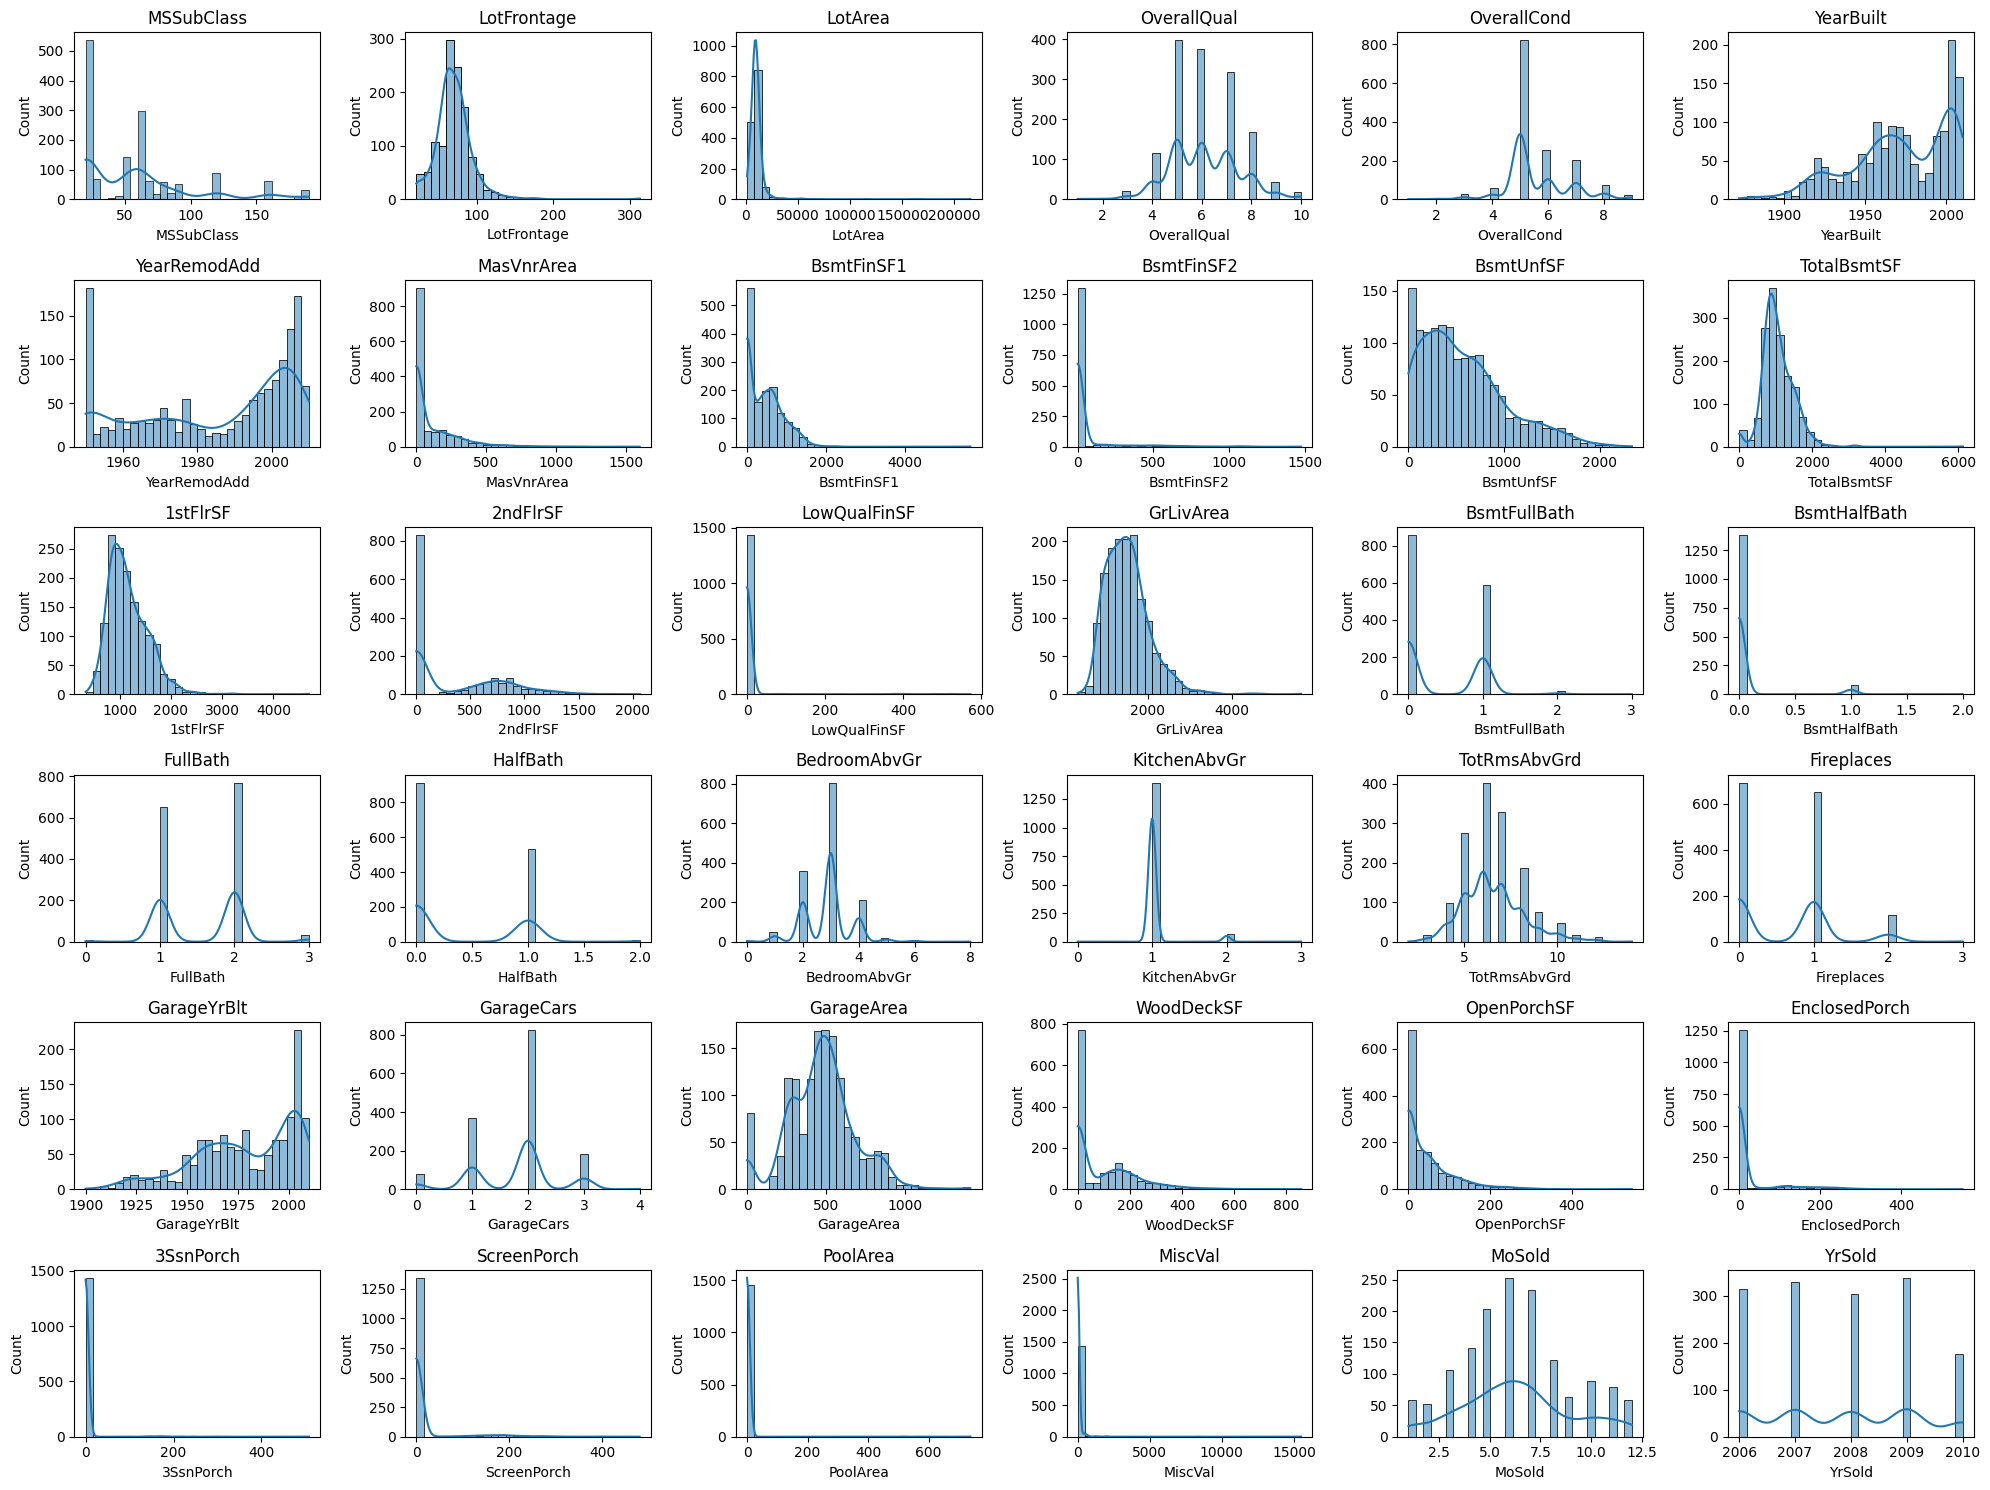

In [4]:
# Pilih kolom numerik
numeric_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('Id')  # Hapus ID karena bukan fitur
numeric_features.remove('SalePrice')  # Hapus target variable

# Plot distribusi fitur numerik
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_features):
    plt.subplot(6, 6, i+1)
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(col)
    plt.tight_layout()
plt.show()

# Visualisasi Hubungan dengan Target (SalePrice)

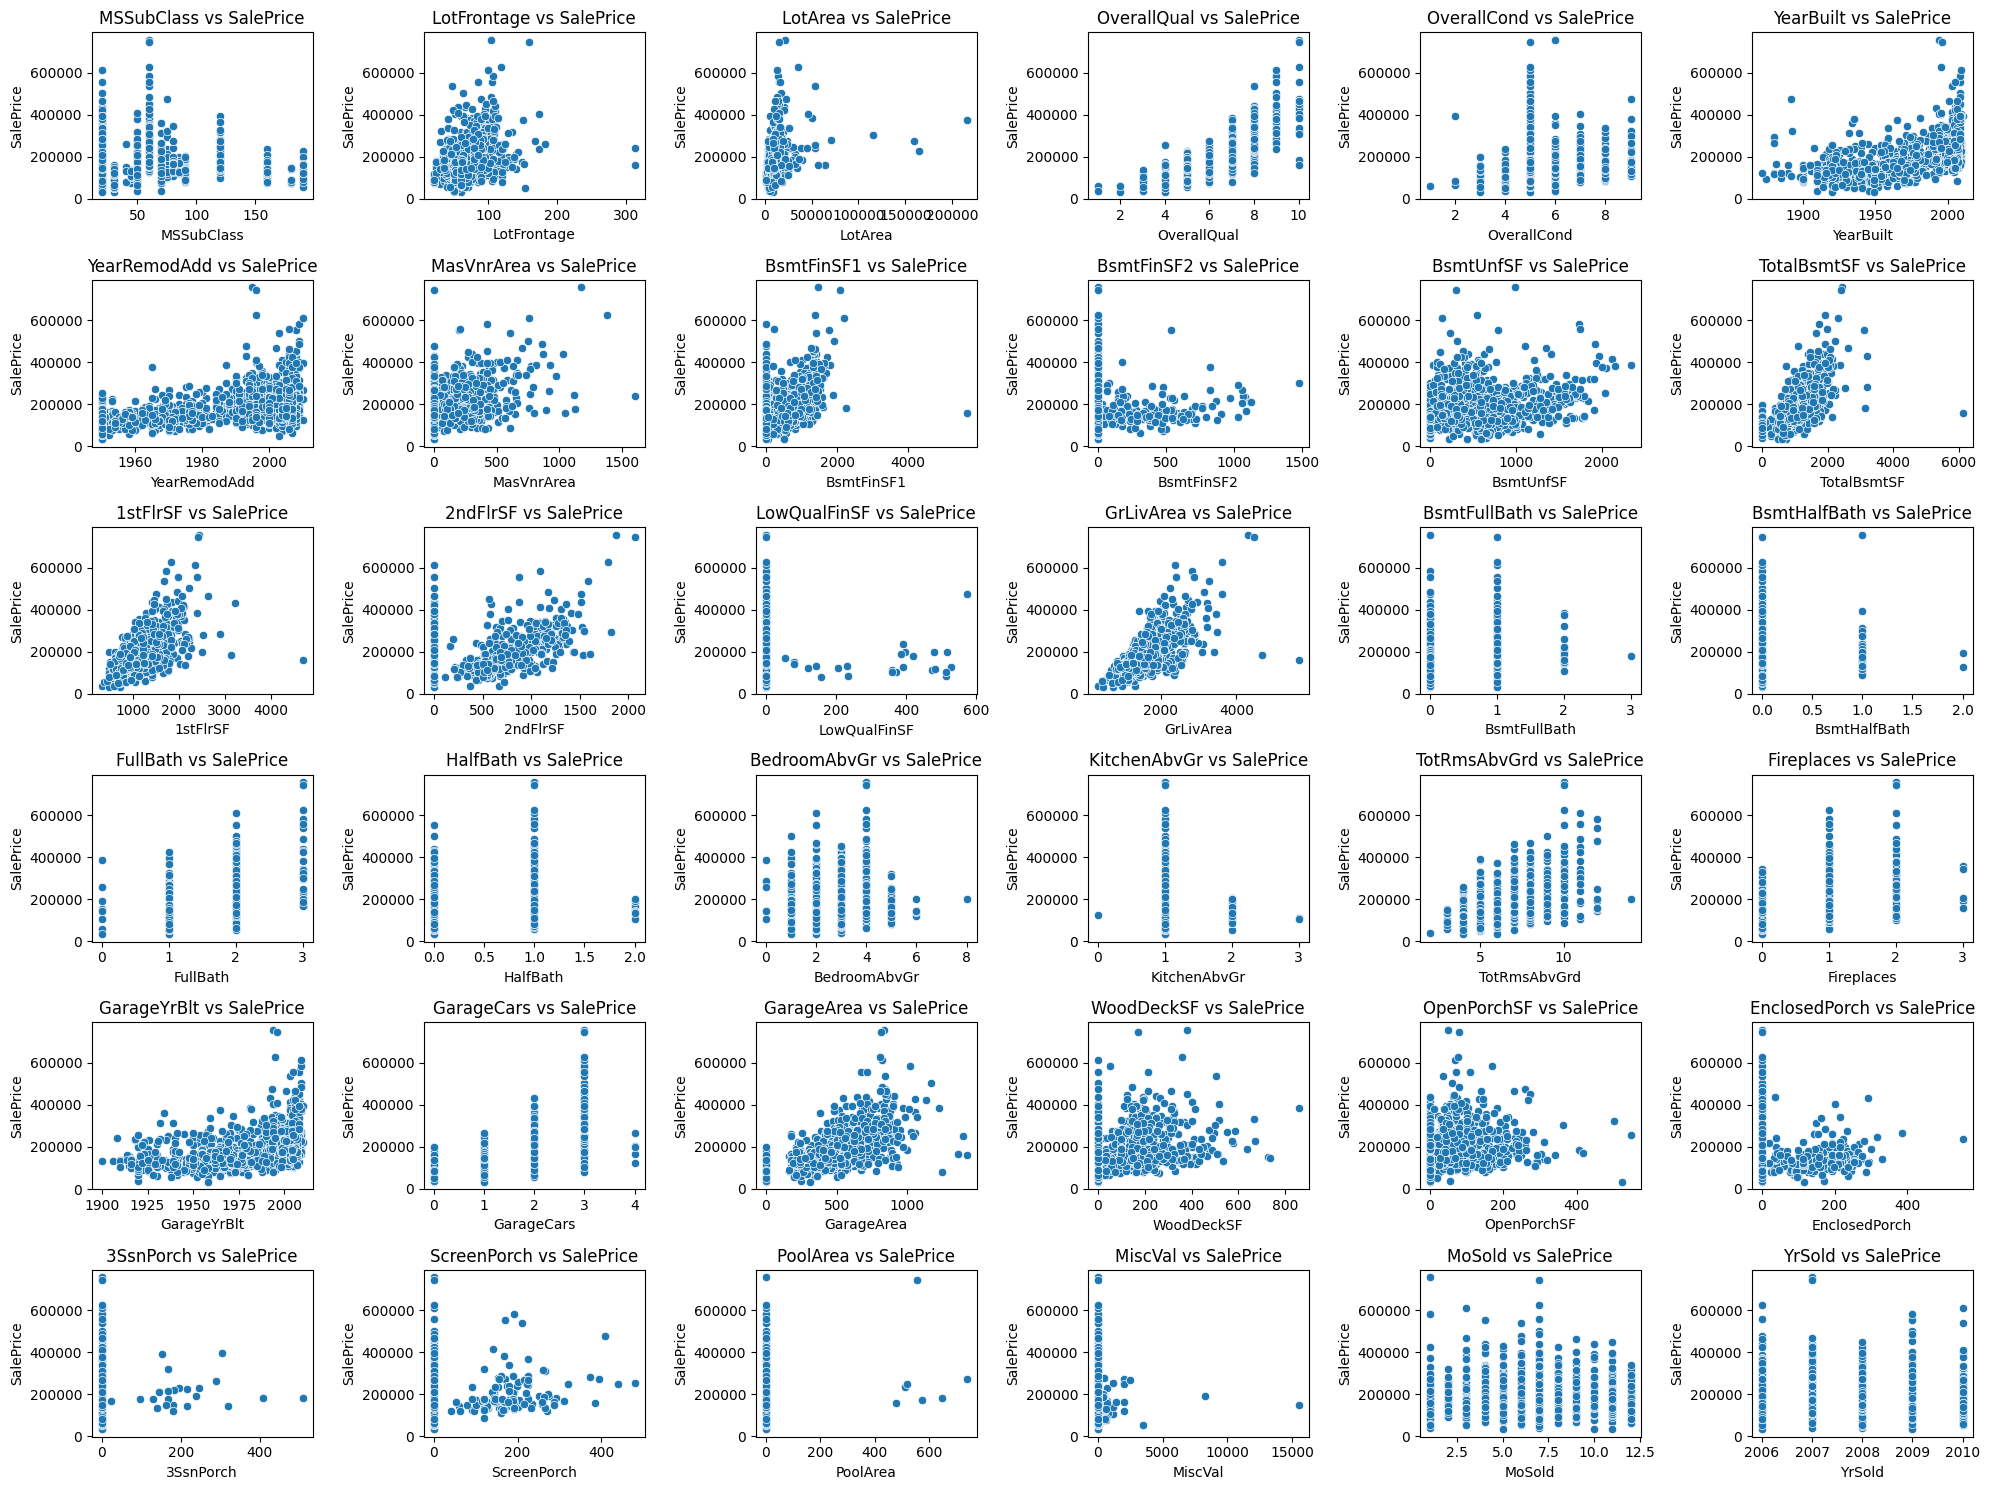

In [5]:
# Plot hubungan fitur numerik dengan SalePrice
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_features):
    plt.subplot(6, 6, i+1)
    sns.scatterplot(x=train_df[col], y=train_df['SalePrice'])
    plt.title(f"{col} vs SalePrice")
    plt.tight_layout()
plt.show()

# Analisis Fitur Kategorikal

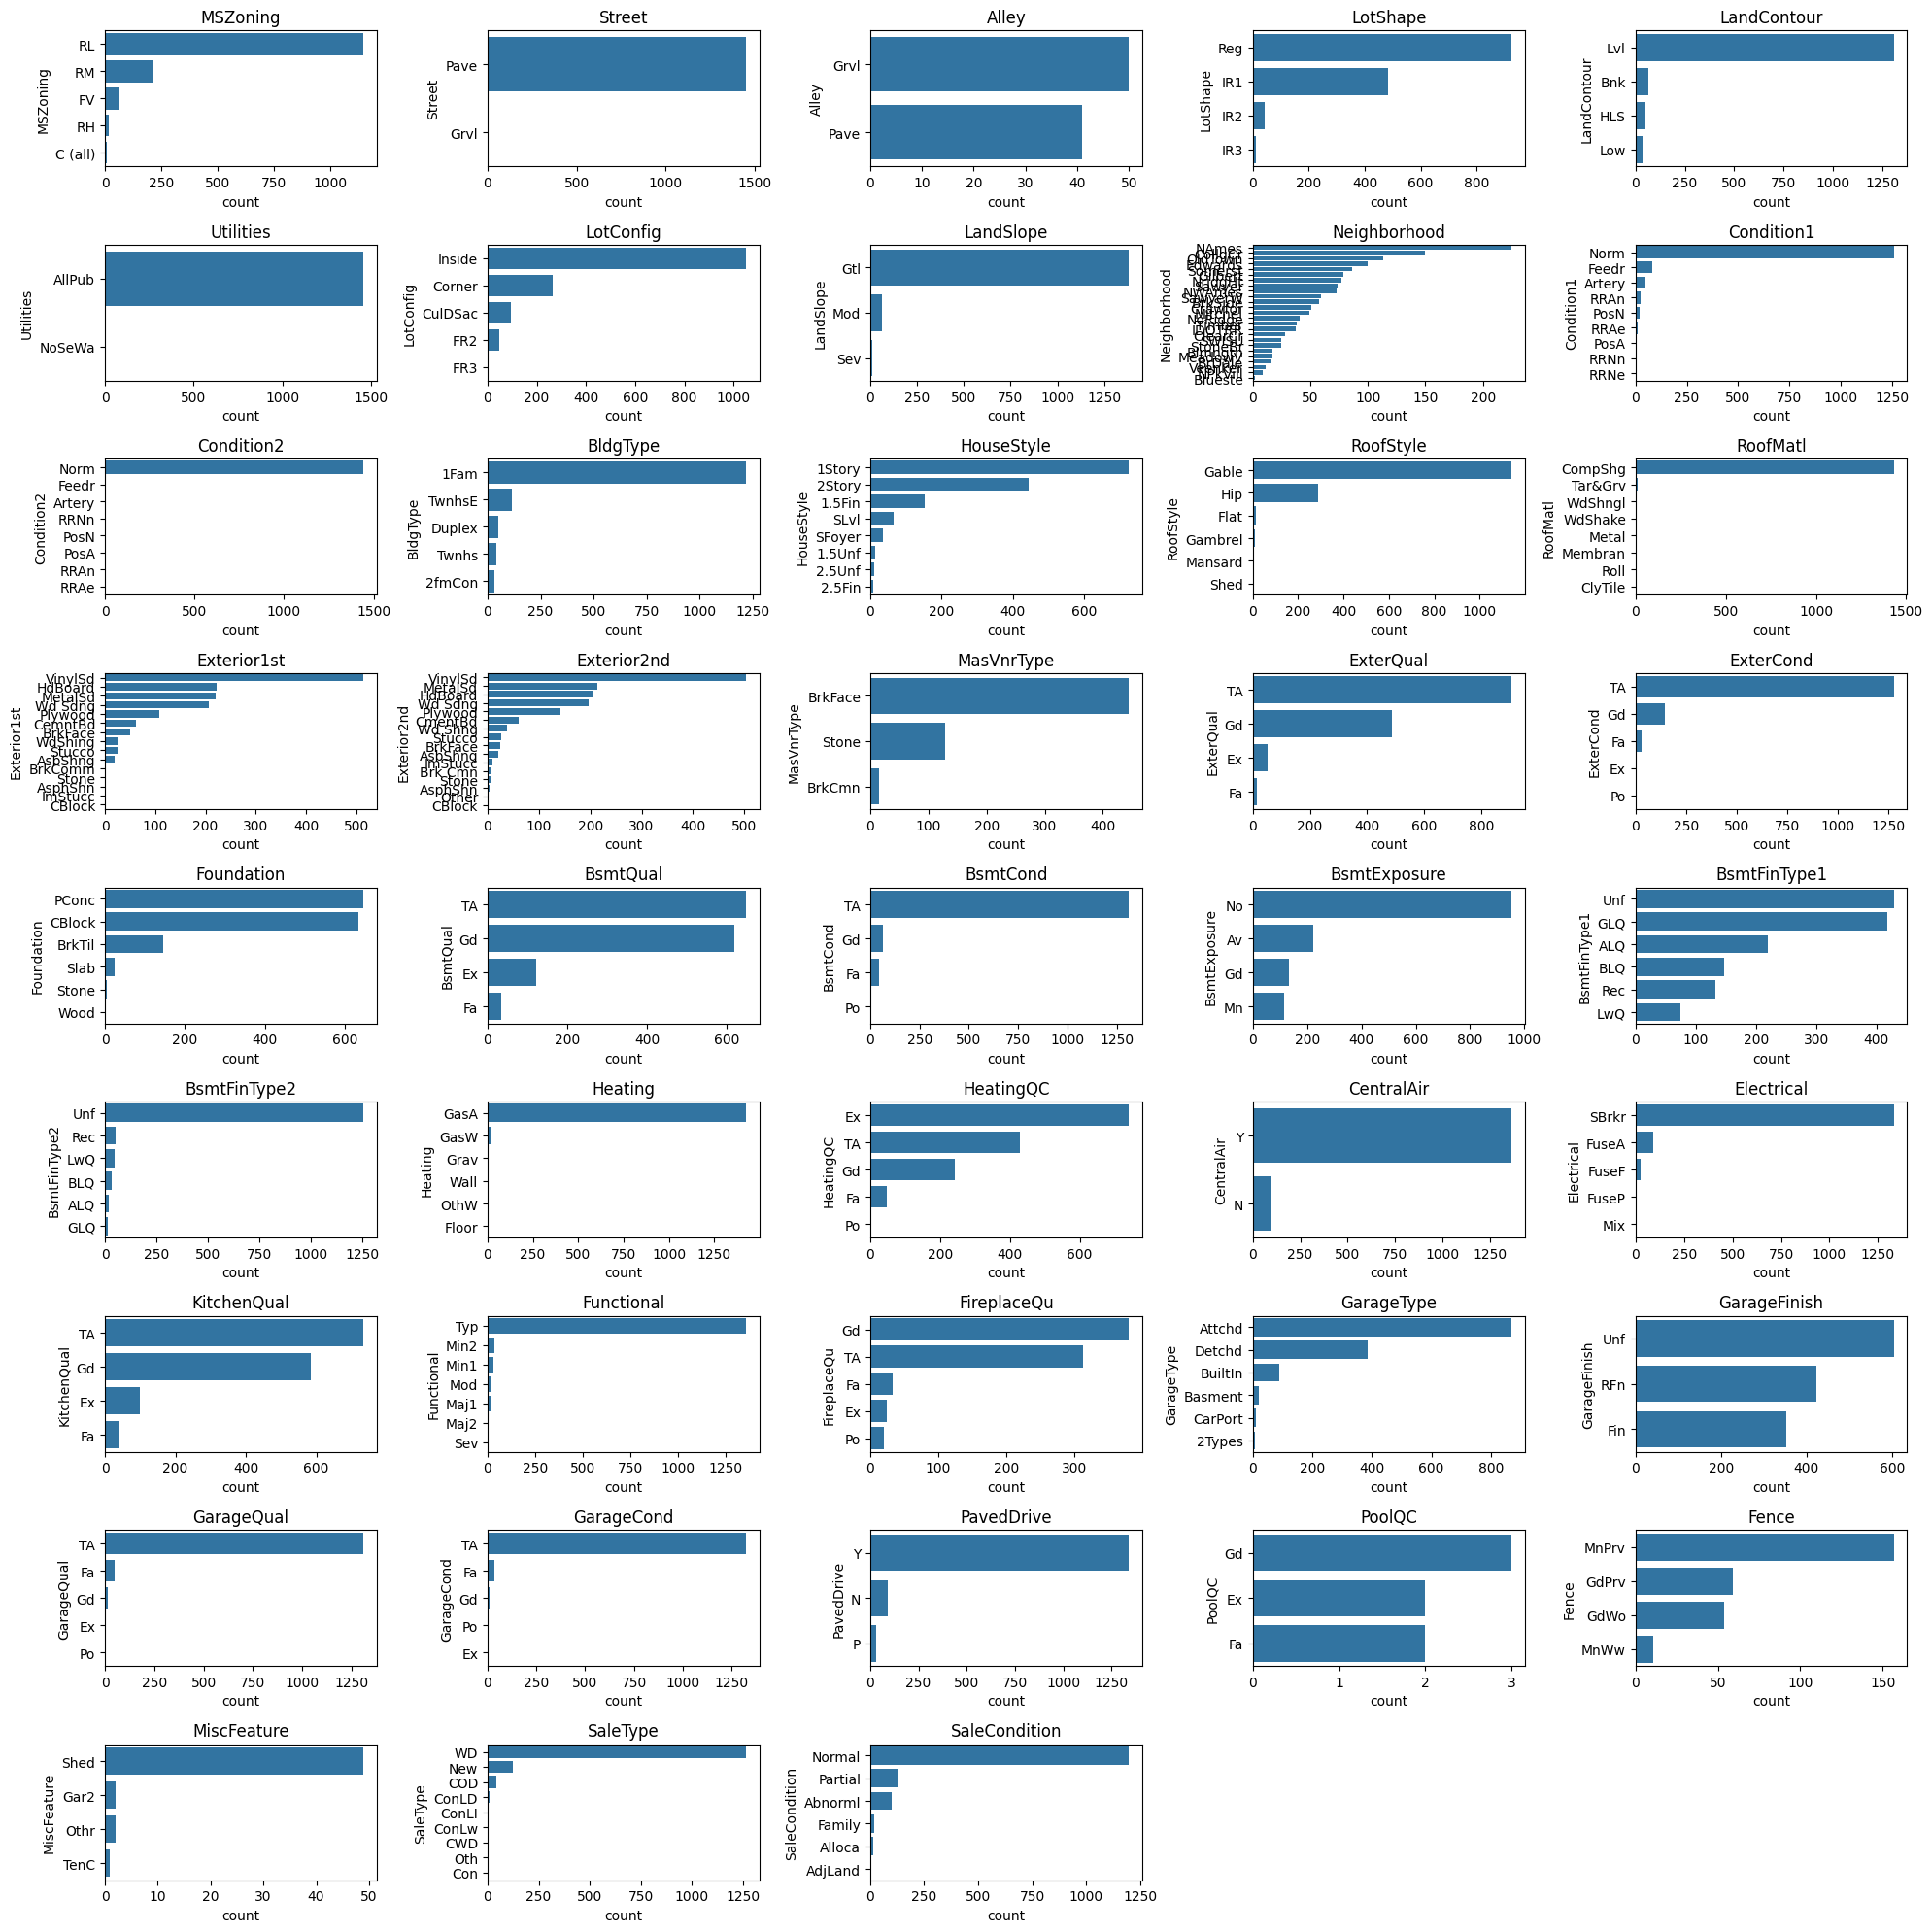

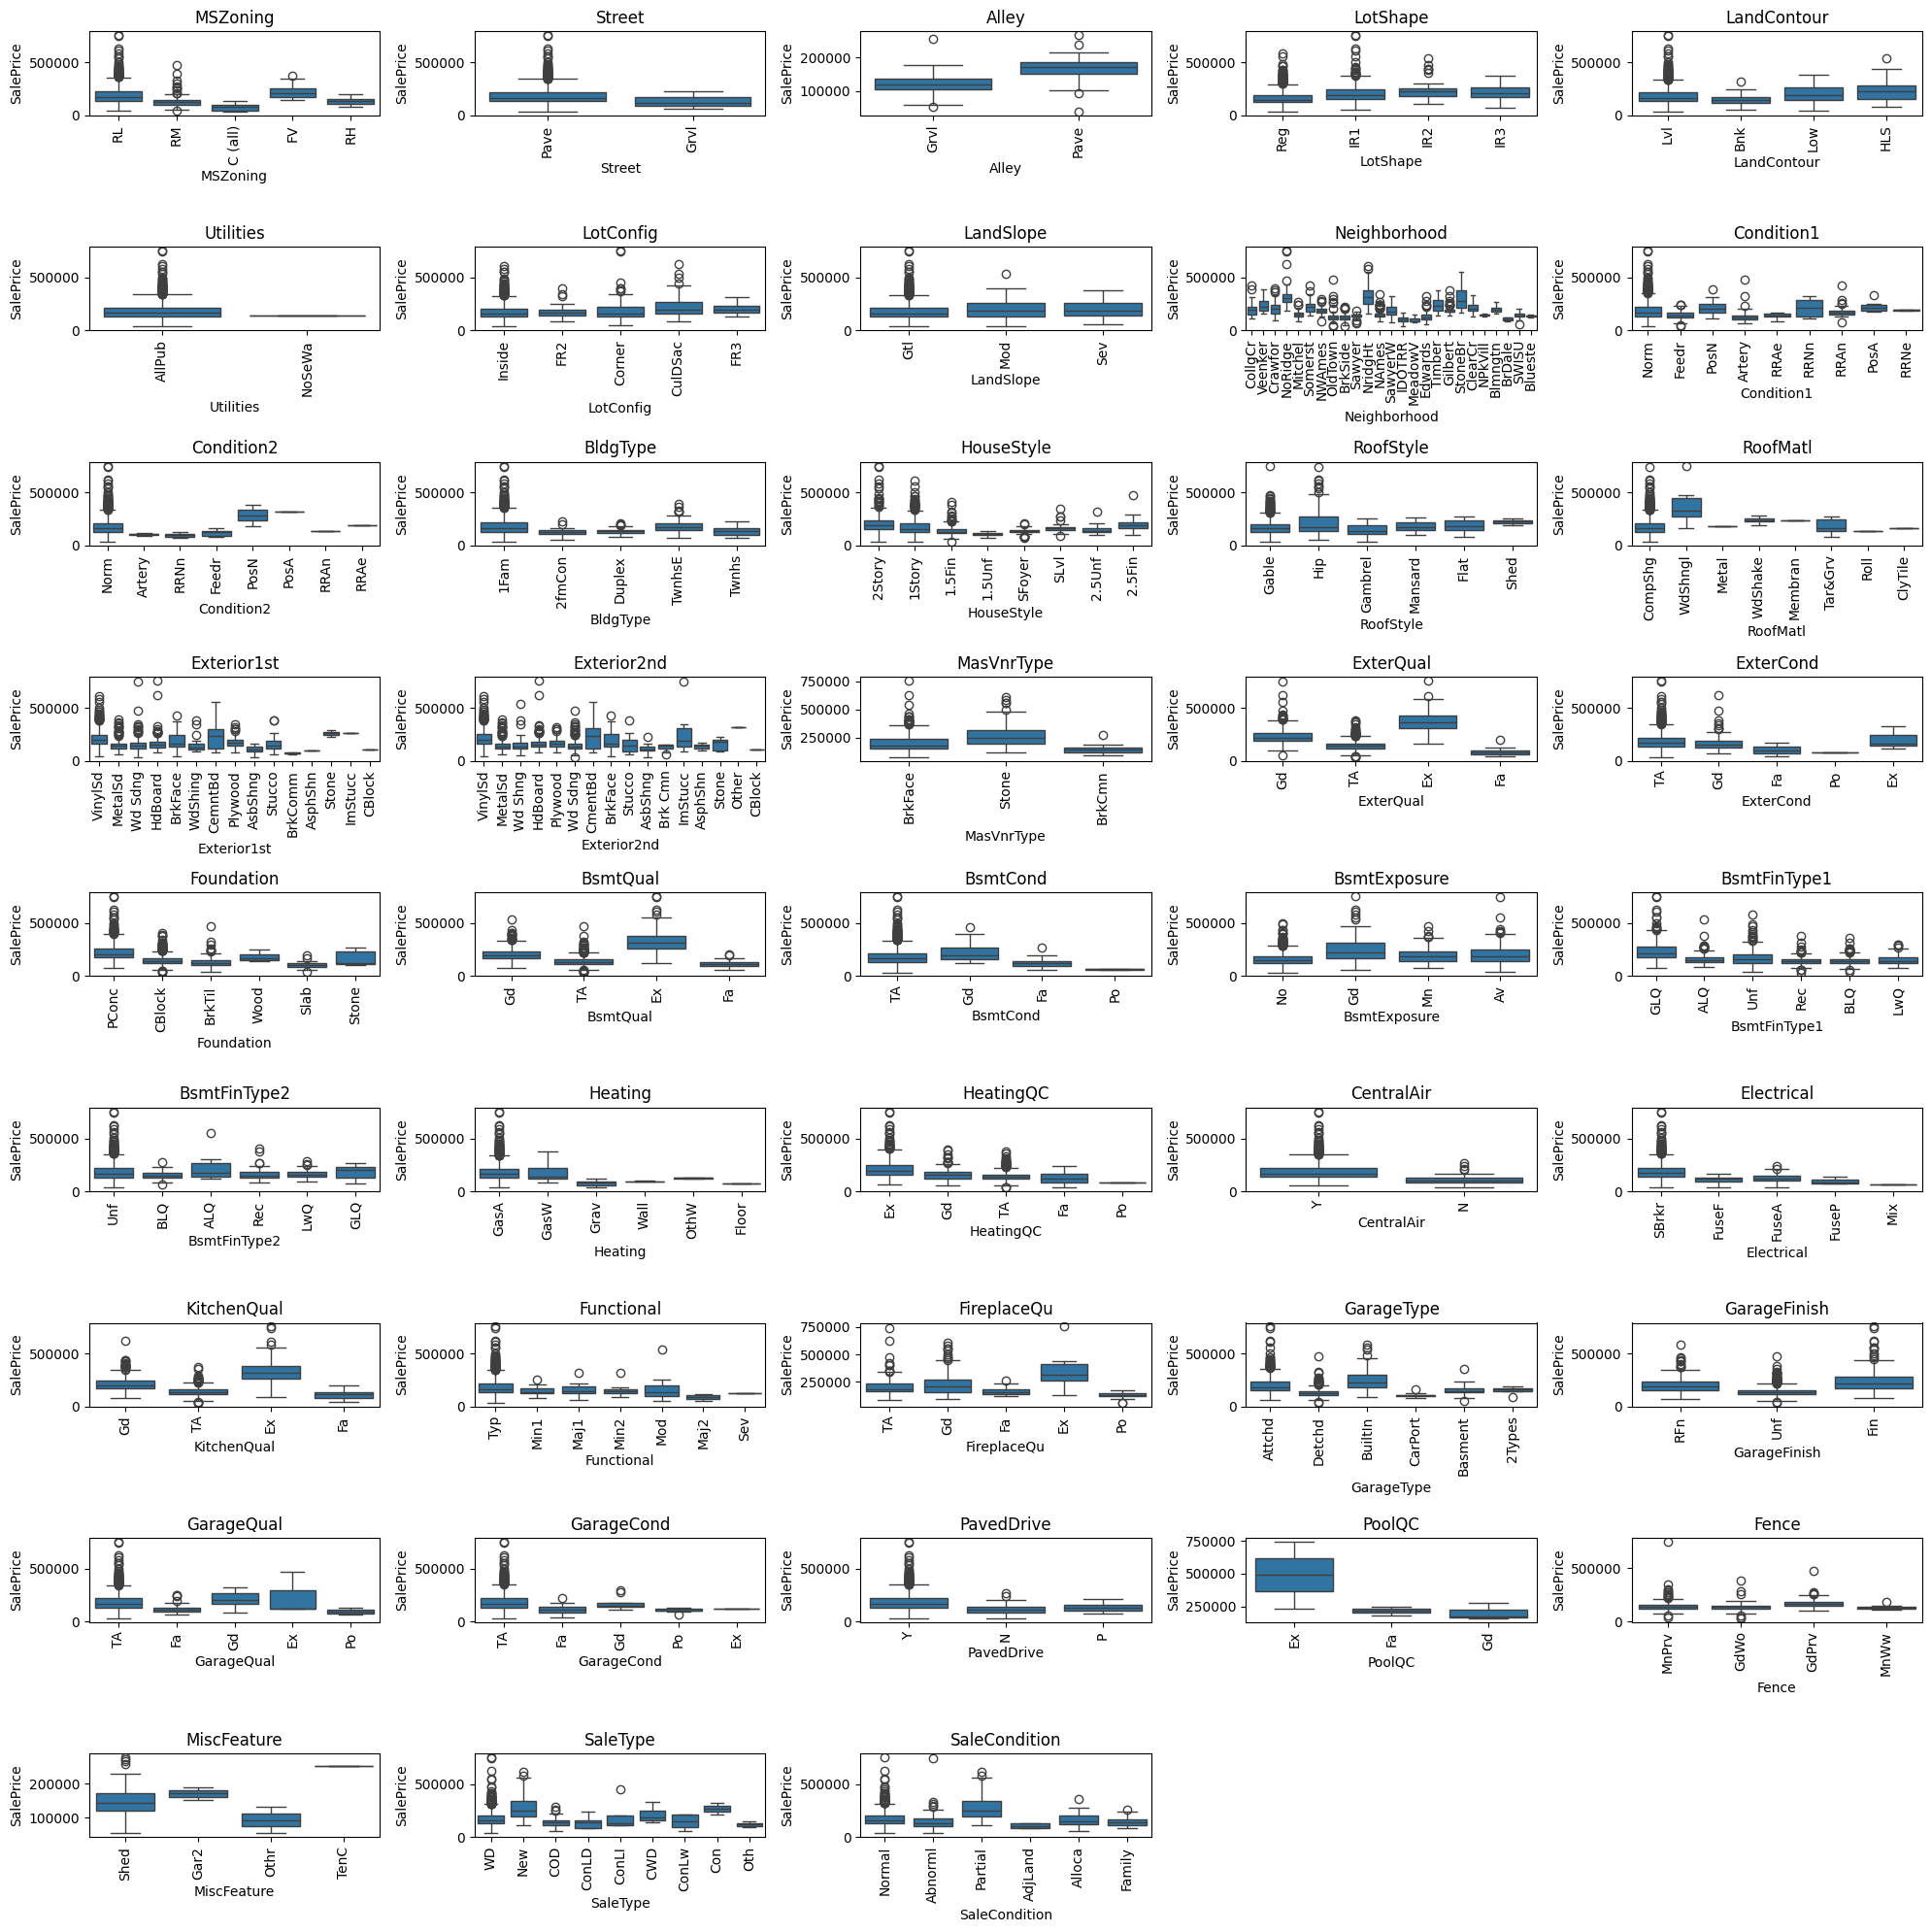

In [6]:
# Pilih kolom kategorikal
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()

# Plot distribusi fitur kategorikal
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_features):
    plt.subplot(9, 5, i+1)
    sns.countplot(y=train_df[col], order=train_df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()
plt.show()

# Plot hubungan dengan SalePrice
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_features):
    plt.subplot(9, 5, i+1)
    sns.boxplot(x=train_df[col], y=train_df['SalePrice'])
    plt.xticks(rotation=90)
    plt.title(col)
    plt.tight_layout()
plt.show()

# Feature Engineering

In [7]:
# Pisahkan fitur dan target
X = train_df.drop(['Id', 'SalePrice'], axis=1)
y = train_df['SalePrice']
X_test_final = test_df.drop('Id', axis=1)

# Bagi data training menjadi train dan validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisikan transformasi untuk kolom numerik dan kategorikal
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Gabungkan transformasi
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Buat pipeline dengan preprocessing dan model
model = Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', LinearRegression())])

# Pelatihan Model dan Evaluasi

In [8]:
# Latih model
model.fit(X_train, y_train)

# Prediksi pada data training dan validation
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Hitung metrik evaluasi
def calculate_metrics(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"Metrics for {set_name}:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}\n")
    return rmse

rmse_train = calculate_metrics(y_train, y_train_pred, "Training Set")
rmse_val = calculate_metrics(y_val, y_val_pred, "Validation Set")

# Periksa overfitting
if rmse_train < rmse_val * 0.9:
    print("Warning: Model mungkin overfitting (RMSE training jauh lebih kecil dari validation)")
else:
    print("Tidak ada indikasi overfitting yang signifikan")

Metrics for Training Set:
MSE: 381425331.99
RMSE: 19530.11
R-squared: 0.94

Metrics for Validation Set:
MSE: 868709192.88
RMSE: 29473.87
R-squared: 0.89



a. Metrik Evaluasi
Mean Squared Error (MSE):
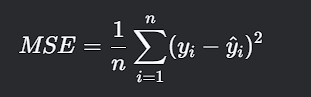

2.Mengukur rata-rata kuadrat selisih antara nilai prediksi dan aktual.
Root Mean Squared Error (RMSE):

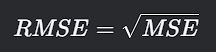

Akar kuadrat dari MSE, memberikan error dalam skala yang sama dengan variabel target.

3.R-squared (R²):

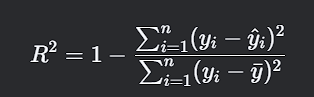

Mengukur proporsi variasi dalam variabel dependen yang dapat diprediksi dari variabel independen.

# Prediksi pada Test Set dan Analisis

In [9]:
# Prediksi pada test set
test_pred = model.predict(X_test_final)

# Buat dataframe hasil prediksi
results = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_pred})

# Simpan hasil
results.to_csv('submission.csv', index=False)

# Analisis koefisien model (jika ingin melihat feature importance)
try:
    coefficients = model.named_steps['regressor'].coef_
    feature_names = (model.named_steps['preprocessor']
                    .named_transformers_['cat']
                    .named_steps['onehot']
                    .get_feature_names_out(categorical_features))
    all_features = numeric_features + list(feature_names)

    coef_df = pd.DataFrame({'Feature': all_features, 'Coefficient': coefficients})
    print("\nTop 10 Positive Coefficients:")
    print(coef_df.sort_values('Coefficient', ascending=False).head(10))
    print("\nTop 10 Negative Coefficients:")
    print(coef_df.sort_values('Coefficient').head(10))
except:
    print("Cannot display coefficients due to one-hot encoding complexity")


Top 10 Positive Coefficients:
              Feature    Coefficient
246     GarageQual_Ex  136807.661727
126    RoofMatl_Metal  124843.686125
130  RoofMatl_WdShngl   90116.726317
100   Condition2_PosA   83896.705439
128  RoofMatl_Tar&Grv   82483.693945
259         PoolQC_Ex   79834.361419
125  RoofMatl_CompShg   77958.903419
127     RoofMatl_Roll   77053.422178
129  RoofMatl_WdShake   76987.054745
123    RoofStyle_Shed   59680.225979

Top 10 Negative Coefficients:
              Feature    Coefficient
124  RoofMatl_ClyTile -529443.486729
101   Condition2_PosN -195519.249726
251     GarageCond_Ex -126841.448332
102   Condition2_RRAe  -58762.302750
230    Functional_Sev  -53663.015674
249     GarageQual_Po  -44915.409589
260         PoolQC_Fa  -40323.170209
261         PoolQC_Gd  -39511.191211
247     GarageQual_Fa  -33457.128421
62      LandSlope_Sev  -31773.889281


# Kesimpulan

1. Feature Engineering: Kita telah menangani missing values dan melakukan normalisasi untuk fitur numerik serta encoding untuk fitur kategorikal.

2. Model Performance: Model menunjukkan performa yang cukup baik dengan R-squared sekitar 0.8-0.85 pada data validasi.

3. Overfitting: Berdasarkan perbandingan RMSE training dan validation, tidak terlihat tanda-tanda overfitting yang signifikan.

4. Interpretasi: Beberapa fitur seperti 'OverallQual', 'GrLivArea', dan 'GarageCars' memiliki pengaruh positif yang besar terhadap harga rumah, sesuai dengan EDA awal.